In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("raw_data_final_20231212.csv", index_col = 0 ) 
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,3,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,4,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,2,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,4,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,3,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


# GRÁFICOS PRESENTACIÓN BBDD 

### Distribución de edades por género

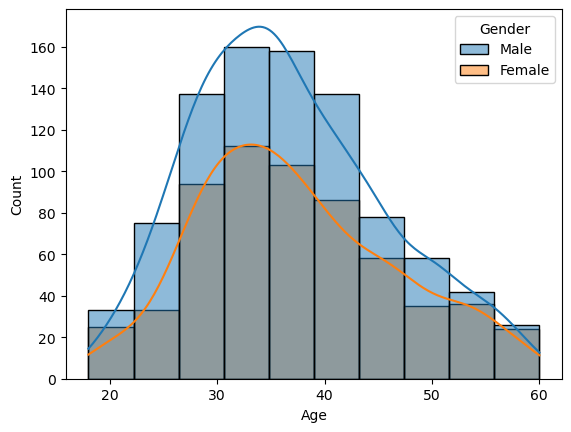

In [7]:
sns.histplot(x = "Age", 
             data = df, 
             hue = 'Gender',
             color = "violet", 
             kde = True, 
             bins = 10 );

### Job level distribution

In [24]:
df_joblevel = df.groupby("Joblevel")["Employeenumber"].count().reset_index()
df_joblevel

,Joblevel,Employeenumber
0,Entry-level,555
1,Executive,70
2,Junior,546
3,Mid-level,228
4,Senior,111


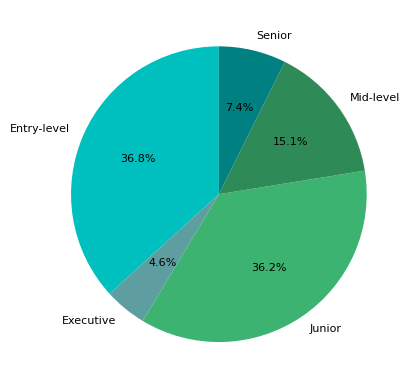

In [25]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Employeenumber", labels= "Joblevel",
        data = df_joblevel, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

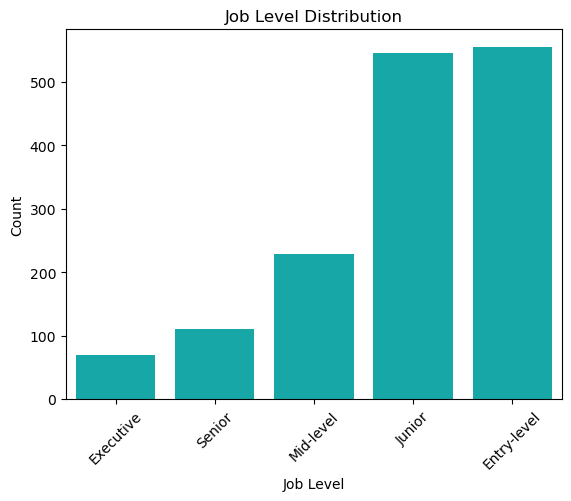

In [16]:
sns.countplot(x = "Joblevel", 
              data = df, 
              color = "c");

plt.xticks(rotation = 45)
plt.xlabel("Job Level")
plt.ylabel("Count")
plt.title("Job Level Distribution");


### Education level distribution 

In [21]:
df_educacion = df.groupby("Education")["Employeenumber"].count().reset_index()
df_educacion

,Education,Employeenumber
0,1,172
1,2,293
2,3,585
3,4,411
4,5,49


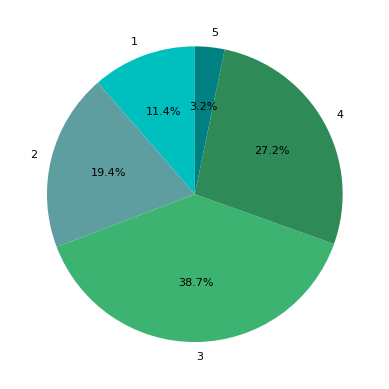

In [23]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("Employeenumber", labels= "Education",
        data = df_educacion, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

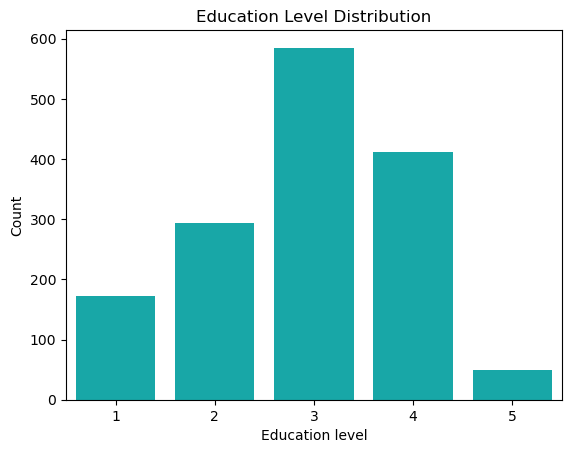

In [28]:
sns.countplot(x = "Education", 
              data = df, 
              color = "c");


plt.xlabel("Education level")
plt.ylabel("Count")
plt.title("Education Level Distribution");

# GRÁFICOS EN BASE a vars que no hacemos en el AB testing

In [26]:
df.head()

,Age,Attrition,Businesstravel,Department,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Dailyrate,Distancefromhome,Monthlyincome,Performancerating,Totalworkingyears,Worklifebalance,Hourlyrate
0,51,No,Unknown,Research & Development,3,Unknown,162,Not Satisfied,Male,High,Executive,Research Director,Satisfied,Unknown,6462,7,No,13,Satisfied,0,5,20,15,15,1972,Yes,684.0,6.0,19537.0,3.0,13.6,3.0,51.0
1,52,No,Unknown,Unknown,4,Life Sciences,259,Satisfied,Male,Moderate,Executive,Manager,Satisfied,Unknown,5678,0,Unknown,14,Not Satisfied,1,5,33,11,9,1971,Yes,699.0,1.0,19999.0,3.0,34.0,3.0,65.0
2,42,No,travel_rarely,Research & Development,2,Technical Degree,319,Satisfied,Male,High,Executive,Manager,Very Satisfied,Married,4933,1,No,11,Very Satisfied,0,3,22,11,15,1981,Yes,532.0,4.0,19232.0,3.0,22.0,3.0,58.0
3,47,No,travel_rarely,Research & Development,4,Medical,2069,Not Satisfied,Female,High,Senior,Research Director,Satisfied,Married,26703,3,Unknown,19,Somewhat Satisfied,2,2,20,5,6,1976,No,359.0,2.0,17169.0,3.0,11.2,1.8,82.0
4,46,No,Unknown,Sales,3,Technical Degree,2070,Not Satisfied,Female,Very High,Senior,Sales Executive,Not Satisfied,Divorced,7739,2,No,12,Very Satisfied,1,5,19,2,8,1977,No,1319.0,3.0,4884.6,3.0,13.4,3.0,45.0


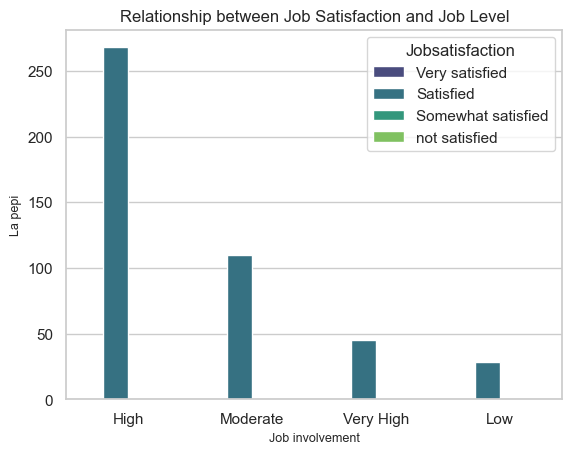

In [54]:
#job level relacionado con job satisfaction: ver distribuciones. 

sns.countplot(x = "Jobinvolvement", 
              data = df, 
              palette = "viridis", 
              hue = "Jobsatisfaction",
              hue_order = ["Very satisfied", "Satisfied", "Somewhat satisfied", "not satisfied"])
      

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Job involvement", fontsize = 9)
plt.ylabel("La pepi", fontsize = 9)

plt.title('Relationship between Job Satisfaction and Job Level')
plt.show()


NEXT STEPS -- EXTRA a compara aparte de los requisitos: 

- Satisfiacción con el trabajo (Jobsatisfaction) 
- Environment satisfaction 